In [6]:
%%capture
import scipy
import scanpy as sc
import anndata as ad
!pip install episcanpy
import episcanpy
import pandas as pd

In [3]:
import scipy
X = scipy.sparse.load_npz("../../working/sparse/train_multi_inputs_values.sparse.npz")
# Xt = scipy.sparse.load_npz("../sparse/test_multi_inputs_values.sparse.npz")
# length = len(X)
# both = np.hstack([X.toarray(),Xt.toarray()])
X = X[:int(X.shape[0]/10)].toarray()

In [12]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
import numpy as np
with np.load('../../working/sparse/train_multi_inputs_idxcol.npz',allow_pickle=True) as data:
    cell_index = data['index']
    cell_columns = data['columns']

In [13]:
adata_atac = pd.DataFrame(X,index = cell_index[:int(len(cell_index)/10)], columns = cell_columns)

In [14]:
adata_atac

,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,GL000195.1:120736-121603,GL000195.1:137437-138345,GL000195.1:15901-16653,GL000195.1:22357-23209,GL000195.1:23751-24619,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
56390cf1b95e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.428336,0.0,0.0,0.0,0.0
fc0c60183c33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9b4a87e22ad0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
81cccad8cd81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15cb3d85c232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904279888676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
e3722232bf73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7d1cd6e9c517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
92a9d261f089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [15]:
adata_atac = sc.AnnData(adata_atac)

# sort peaks position, required by episcanpy
adata_atac = adata_atac[:,sorted(adata_atac.var_names)]

In [16]:
adata_atac.var_names_make_unique()

var_list = []
for i in adata_atac.var_names:
    new_i=i.replace('-', '_').replace(':','_')
    var_list.append(new_i)

In [19]:
adata_atac.var_names = var_list 

adata_new = episcanpy.tl.geneactivity(adata_atac, gtf_file = "../../working/gene_annot/gencode.vM31.annotation.gtf",annotation='HAVANA')

KeyboardInterrupt: 

In [20]:
%cd ../../working/gene_annot/

/home/jovyan/kaggle/working/gene_annot


In [21]:
!gzip -d gencode.v42.primary_assembly.annotation.gtf.gz

In [22]:
%cd -

/home/jovyan/kaggle/neurips_2022_notebooks/notebooks


In [28]:
X = scipy.sparse.load_npz("../../working/sparse/train_multi_inputs_values.sparse.npz")
with np.load('../../working/sparse/train_multi_inputs_idxcol.npz',allow_pickle=True) as data:
    cell_index = data['index']
    cell_columns = data['columns']
X = X[:int(X.shape[0]/1000)].toarray()
cell_index = cell_index[:int(len(cell_index)/1000)]
#adata_atac = pd.DataFrame(X[start*int(len(X)/4):(start+1)*int(len(X)/4)],index = cell_index[start*int(len(cell_index)/4):(start+1)*int(len(cell_index)/4)], columns = [ch_str(x) for x in cell_columns])    


In [29]:
start = 0
X[start*int(len(X)/4):(start+1)*int(len(X)/4)].shape

(26, 228942)

In [33]:
with np.load('../../working/sparse/train_multi_inputs_idxcol.npz',allow_pickle=True) as data:
    cell_index = data['index']
    cell_columns = data['columns']
cell_index

array(['56390cf1b95e', 'fc0c60183c33', '9b4a87e22ad0', ...,
       '00783f28b463', 'e7abb1a0f251', '193992d571a5'], dtype=object)

In [31]:
(start+1)*int(a/4)

0

In [30]:
cell_index[start*int(len(cell_index)/4):(start+1)*int(len(cell_index)/4)].shape

(0,)

In [37]:
%pwd

'/home/jovyan/kaggle/neurips_2022_notebooks/notebooks'

In [53]:
%%capture
!pip install episcanpy
!pip install -q tables
import os
import gc

import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

from tqdm.auto import tqdm
from multiprocessing import Pool

# Train multi data contains 105942 cells
def ch_str(x):
    x = x.replace(':', '_')
    x = x.replace('-', '_')
    return x

class get_geneactivity():
    def __init__(self, state='train'):
        self.state = state
    def __call__(self,start):
        adata_atac = pd.DataFrame(X[start*int(len(X)/4):(start+1)*int(len(X)/4)],index = cell_index[start*int(len(cell_index)/4):(start+1)*int(len(cell_index)/4)], columns = [ch_str(x) for x in cell_columns])    
        atac_data = ad.AnnData(adata_atac)
        atac_data.var_names_make_unique()
        #atac_data = atac_data[:,sorted(atac_data.var_names)]
        atac_data_new = epi.tl.geneactivity(atac_data,
                              '../../working/gene_annot/gencode.v42.primary_assembly.annotation.gtf',
                              upstream=len(atac_data.X)*2)
        return atac_data_new

X = scipy.sparse.load_npz("../../working/sparse/train_multi_inputs_values.sparse.npz")
with np.load('../../working/sparse/train_multi_inputs_idxcol.npz',allow_pickle=True) as data:
    cell_index = data['index']
    cell_columns = data['columns']
X = X[:int(X.shape[0]/10)].toarray()
cell_index = cell_index[:int(len(cell_index)/10)]

In [54]:
n_iter = 4
func = get_geneactivity('train')
with Pool(processes=4) as pool:
    r = pool.map(func, range(n_iter))
X = np.concatenate([i.X for i in r],axis=0)

In [69]:
columns = [x.split('.')[0] for x in r[0].var['gene_id']]

In [67]:
r[0].var['gene_id'].values

SLC35A3            ENSG00000117620.15
ENSG00000283761     ENSG00000283761.1
ENSG00000288826     ENSG00000288826.1
MFSD14A            ENSG00000156875.14
ENSG00000241073     ENSG00000241073.1
                          ...        
KDM5DP1             ENSG00000277438.1
EIF1AY             ENSG00000198692.10
TBL1YP1             ENSG00000225624.1
RPS4Y2              ENSG00000280969.2
ENSG00000289707     ENSG00000289707.1
Name: gene_id, Length: 19609, dtype: object

In [116]:
columns[19091]

'ENSG00000000003'

In [63]:
X.shape

(10592, 19609)

In [57]:
np.save("/kaggle/working/gene_annot/train_multi_geneactivity.npy",X)

In [58]:
np.savetxt("/kaggle/working/gene_annot/train_multi_geneactivity.csv",X)

In [59]:
del X

In [60]:
X = np.load("/kaggle/working/gene_annot/train_multi_geneactivity.npy")

In [62]:
X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        2.8540814],
       [0.       , 0.       , 0.       , ..., 0.       , 4.730245 ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        2.2912753],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [81]:
with np.load('/kaggle/working/sparse/train_multi_targets_idxcol.npz',allow_pickle=True) as data:
    cell_columns = data['columns']

In [76]:
%%capture
!pip install matplotlib_venn

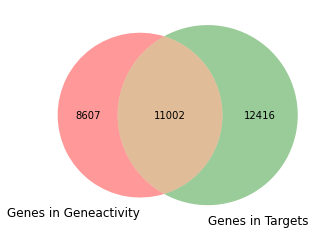

In [83]:
from matplotlib_venn import venn2
# check gene overlaps
diff_a = set(columns) - set(cell_columns)
diff_b = set(cell_columns) - set(columns)
inter = set(cell_columns) & set(columns)
venn2(subsets = (len(diff_a), len(diff_b), len(inter)), set_labels = ('Genes in Geneactivity', 'Genes in Targets'))

In [103]:
to_keep_y = pd.Series([i for i,x in enumerate(cell_columns) if x in columns],index=[x for i,x in enumerate(cell_columns) if x in columns])

In [104]:
to_keep_y = keep_y.sort_index()

In [105]:
to_keep = pd.Series([i for i,x in enumerate(columns) if x in cell_columns],index=[x for i,x in enumerate(columns) if x in cell_columns])

In [106]:
to_keep = to_keep.sort_index()

In [109]:
to_keep_y

ENSG00000000003    21664
ENSG00000000419     9634
ENSG00000000457    18887
ENSG00000000460     7297
ENSG00000000971     8281
                   ...  
ENSG00000288107     5703
ENSG00000288111     3600
ENSG00000288234     7146
ENSG00000288253     1056
ENSG00000288302     4660
Length: 11002, dtype: int64

In [110]:
to_keep

ENSG00000000003    19091
ENSG00000000419    17428
ENSG00000000457     1042
ENSG00000000460     1037
ENSG00000000971     1286
                   ...  
ENSG00000288107     9458
ENSG00000288111     3972
ENSG00000288234     9031
ENSG00000288253    16476
ENSG00000288302    10740
Length: 11002, dtype: int64

In [111]:
to_keep = to_keep.values
to_keep_y = to_keep_y.values

In [112]:
np.save('/kaggle/working/gene_annot/to_keep.npy',to_keep)

In [113]:
np.save('/kaggle/working/gene_annot/to_keep_y.npy',to_keep_y)

In [ ]:
from scipy.sparse import csr_array
csr_array(X)

In [46]:
r[0].X.shape

(264, 17052)

In [49]:
abc = [i.X for i in r]
abc = np.concatenate(abc,axis=0)

In [50]:
abc.shape

(1056, 17052)

In [51]:
r

[AnnData object with n_obs × n_vars = 264 × 17052
     var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id',
 AnnData object with n_obs × n_vars = 264 × 17052
     var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id',
 AnnData object with n_obs × n_vars = 264 × 17052
     var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id',
 AnnData object with n_obs × n_vars = 264 × 17052
     var: 'gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'protein_id']

In [120]:
meta.loc[meta.day == 7].sample(frac=1).iloc[:10000]['count']

cell_id
bdd29941014f     68379
b85bd86783f9     33366
2a933a7a42ec     33335
21d0e6bca448     31856
411283bc928a    104035
                 ...  
4368aa6716b7     68105
405dad6b3d44     61902
7b422c4cc169     99653
febd83392b96     28528
faa9757fd683     67916
Name: count, Length: 10000, dtype: int64

In [7]:
%%capture
!pip install episcanpy
!pip install -q tables
import os
import gc

import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

from tqdm.auto import tqdm
from multiprocessing import Pool

# Train multi data contains 105942 cells
def ch_str(x):
    x = x.replace(':', '_')
    x = x.replace('-', '_')
    return x

class get_geneactivity():
    def __init__(self, state='train'):
        self.state = state
    def __call__(self,start):
        adata_atac = pd.DataFrame(X[start*int(len(X)/4):(start+1)*int(len(X)/4)],index = cell_index[start*int(len(cell_index)/4):(start+1)*int(len(cell_index)/4)], columns = [ch_str(x) for x in cell_columns])    
        atac_data = ad.AnnData(adata_atac)
        atac_data.var_names_make_unique()
        #atac_data = atac_data[:,sorted(atac_data.var_names)]
        atac_data_new = epi.tl.geneactivity(atac_data,
                              '../../working/gene_annot/gencode.v42.primary_assembly.annotation.gtf',
                              upstream=len(atac_data.X)*2)
        return atac_data_new

X = scipy.sparse.load_npz("../../working/sparse/train_multi_inputs_values.sparse.npz")
with np.load('../../working/sparse/train_multi_inputs_idxcol.npz',allow_pickle=True) as data:
    cell_index = data['index']
    cell_columns = data['columns']
metadata_df = pd.read_csv('../../input/open-problems-multimodal/metadata.csv', index_col='cell_id')
metadata_df = metadata_df[metadata_df.technology=="multiome"]
meta = metadata_df.reindex(cell_index)
meta['count'] = range(len(meta))
indices = meta.loc[meta.day == 7].sample(frac=1).iloc[:10000]['count'].values
X = X[indices]
X = X.toarray()
cell_index = cell_index[indices]

In [8]:
n_iter = 4
func = get_geneactivity('train')
with Pool(processes=4) as pool:
    r = pool.map(func, range(n_iter))
X = np.concatenate([i.X for i in r],axis=0)

In [9]:
np.save("/kaggle/working/gene_annot/train_multi_geneactivity_day_7.npy",X)